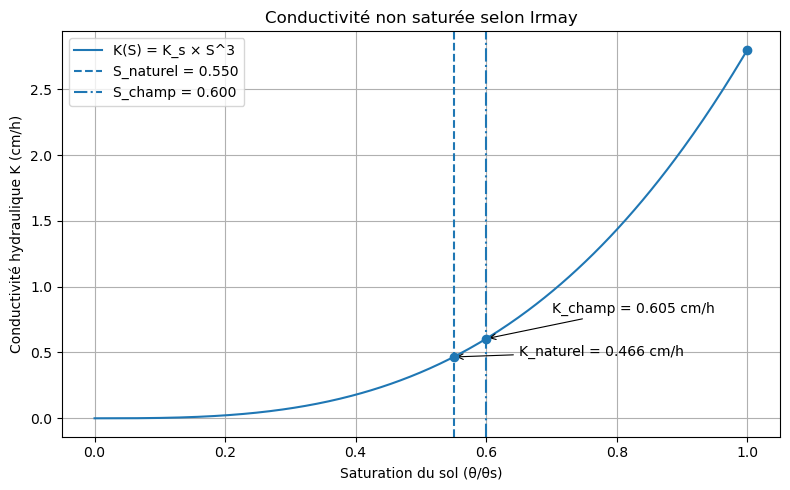

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres (modifiable)
Ks = 2.8  # conductivité à saturation en cm/h
theta_s = 0.4545  # teneur volumétrique à saturation (m3/m3)
theta_naturel = 0.25  # teneur volumétrique naturelle (m3/m3)
theta_champ = 0.2727  # teneur volumétrique à la capacité au champ (m3/m3)

# Calcul des saturations correspondantes
S_naturel = theta_naturel / theta_s
S_champ = theta_champ / theta_s

# Echelle de saturation
S = np.linspace(0, 1.0, 400)

# Loi d'Irmay (forme cubique en saturation) : K = Ks * S^3
K = Ks * S**3

# Valeurs aux points d'intérêt
K_naturel = Ks * S_naturel**3
K_champ = Ks * S_champ**3

# Tracé
plt.figure(figsize=(8,5))
plt.plot(S, K, label='K(S) = K_s × S^3')
plt.scatter([S_naturel, S_champ, 1.0], [K_naturel, K_champ, Ks], zorder=5)
plt.axvline(S_naturel, linestyle='--', label=f'S_naturel = {S_naturel:.3f}')
plt.axvline(S_champ, linestyle='-.', label=f'S_champ = {S_champ:.3f}')
plt.xlabel('Saturation du sol (θ/θs)')
plt.ylabel('Conductivité hydraulique K (cm/h)')
plt.title("Conductivité non saturée selon Irmay")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotations numériques
plt.annotate(f'K_naturel = {K_naturel:.3f} cm/h', xy=(S_naturel, K_naturel), xytext=(S_naturel+0.1, K_naturel+0.01),
             arrowprops=dict(arrowstyle='->', linewidth=0.8))
plt.annotate(f'K_champ = {K_champ:.3f} cm/h', xy=(S_champ, K_champ), xytext=(S_champ+0.1, K_champ+0.2),
             arrowprops=dict(arrowstyle='->', linewidth=0.8))
plt.show()


Heure | P (mm/h) | f_mid (mm/h) | infil (mm) | runoff (mm)
    1 |    3.00 |     97.1115 |    3.0000 |    0.0000
    2 |    5.00 |     25.5528 |    5.0000 |    0.0000
    3 |    6.10 |      9.5860 |    6.1000 |    0.0000
    4 |    5.60 |      6.0233 |    5.6000 |    0.0000
    5 |    8.10 |      5.2283 |    5.2283 |    2.8717
    6 |   10.40 |      5.0509 |    5.0509 |    5.3491
    7 |    7.00 |      5.0114 |    5.0114 |    1.9886
    8 |    5.00 |      5.0025 |    5.0000 |    0.0000

Totaux:
Précipitation totale = 50.2000 mm = 100400.00 m^3
Infiltration totale = 39.9906 mm = 79981.27 m^3
Ruissellement total = 10.2094 mm = 20418.73 m^3

Heures avec ruissellement (P > f_mid): [5, 6, 7]


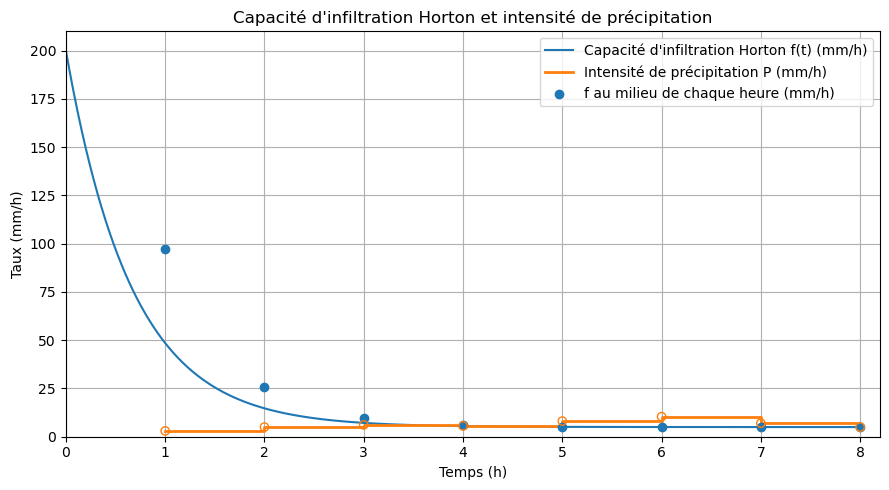

In [6]:
# Données
area_km2 = 2.0
area_m2 = area_km2 * 1e6

f0 = 200.0   # mm/h
fc = 5.0     # mm/h
k = 1.5      # 1/h

hours = np.arange(1,9)  # heures 1..8
P = np.array([3.0,5.0,6.1,5.6,8.1,10.4,7.0,5.0])  # mm/h

# Loi de Horton
def f_horton(t):
    return fc + (f0 - fc) * np.exp(-k * t)

# Calculs pour tracé continu
t_cont = np.linspace(0, 8, 801)
f_cont = f_horton(t_cont)

# On évalue la capacité au milieu de chaque heure (convention)
t_mid = hours - 0.5
f_mid = f_horton(t_mid)

# Infiltration effective par heure (mm) : min(capacité, intensité) * 1 h
infil_per_hour = np.minimum(f_mid, P)
runoff_per_hour = P - infil_per_hour

# Totaux
precip_total_mm = P.sum()
infil_total_mm = infil_per_hour.sum()
runoff_total_mm = runoff_per_hour.sum()

precip_total_m3 = precip_total_mm/1000.0 * area_m2
infil_total_m3 = infil_total_mm/1000.0 * area_m2
runoff_total_m3 = runoff_total_mm/1000.0 * area_m2

# Affichage tableau
print("Heure | P (mm/h) | f_mid (mm/h) | infil (mm) | runoff (mm)")
for h, p, fm, inf, ro in zip(hours, P, f_mid, infil_per_hour, runoff_per_hour):
    print(f"{h:5d} | {p:7.2f} | {fm:11.4f} | {inf:9.4f} | {ro:9.4f}")

print("\nTotaux:")
print(f"Précipitation totale = {precip_total_mm:.4f} mm = {precip_total_m3:.2f} m^3")
print(f"Infiltration totale = {infil_total_mm:.4f} mm = {infil_total_m3:.2f} m^3")
print(f"Ruissellement total = {runoff_total_mm:.4f} mm = {runoff_total_m3:.2f} m^3")

# Heures avec ruissellement
runoff_hours = hours[P > f_mid]
print("\nHeures avec ruissellement (P > f_mid):", runoff_hours.tolist())

# Tracé
plt.figure(figsize=(9,5))
plt.plot(t_cont, f_cont, label="Capacité d'infiltration Horton f(t) (mm/h)", color='C0')
plt.step(hours, P, where='post', label='Intensité de précipitation P (mm/h)', color='C1', linewidth=2)
plt.scatter(hours, f_mid, color='C0', zorder=6, label='f au milieu de chaque heure (mm/h)')
plt.scatter(hours, P, facecolors='none', edgecolors='C1', zorder=6)
plt.xlabel("Temps (h)")
plt.ylabel("Taux (mm/h)")
plt.title("Capacité d'infiltration Horton et intensité de précipitation")
plt.xlim(0,8.2)
plt.ylim(0, max(P.max()*1.1, f0*1.05))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
